# <center>  GEOS3009/3909 – COASTAL ENVIRONMENTS AND PROCESSES

## <center>   PRACTICAL – PROCESSING WAVE DATA
    
<br>
<br>
<br>

Repeat the steps from part 2 for Maroubra data:

Import some libraries:

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import cm
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.mlab as mlab
from scipy.signal import hann 
from pyfftw.interfaces import scipy_fftpack as fftw

C:\Users\lachl\AppData\Local\Temp\ipykernel_6772\2982520754.py:6: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [51]:
#Import the csv's we created in the previous notebook:
maroubra = pd.read_csv('..\data\maroubra_data.csv')

#Convert to datetime again
maroubra['dates'] = pd.to_datetime(maroubra['dates'])

## Reshape data for spectral analyses


Let's look at Maroubra:

In [71]:
Hz = 8. # sample freq.
rl = 5 # minutes
dt = 1./Hz
bl = int((rl/dt)*60.) # burst length
nbl = int(math.floor(len(maroubra)/bl))

# Reshape data
time = maroubra.dates[0:nbl*bl].values.reshape((bl,nbl), order='F')
press = maroubra['pressure'][0:nbl*bl].values.reshape((bl,nbl), order='F')

mean_pressure = press.mean(axis=0)



In [72]:
def PT_power(x, dt, h=0):
    
    n = len(x)
    xd = mlab.detrend(x)
    
    if h > 0:
        xd = xd*hann(n+2)[1:-1]

    xn = fftw.fft(xd,n)
    if h > 0:
        xn = xn*np.sqrt(8/3)
        
    pxx = dt*(xn*np.conj(xn))/n
    
    paa = np.sqrt(xn*np.conj(xn))/n
    pxx = dt*(xn*np.conj(xn))/n
    
    nf= int(np.fix((n/2)+1))
    px=2.0 * pxx[0:nf]
    pa=2.0 * paa[0:nf]
    step = 1/(n*dt)
    f = np.arange(0, 1/(2.*dt)+step, step)[0:-1]
    
    return px, f, pa 

def Wwaves_spectral_RBR(px_in,f_in,dt):
    
    n21 = len(px_in)
    n = (n21-1)*2
    
    jj = np.argwhere((f_in>=0.33)&(f_in<1))[:,0]
    
    f = f_in[jj]
    px = px_in[jj]
    
    m0 = np.sum(px)/(n*dt)
    m1 = np.sum(f*px)/(n*dt);
    m2 = np.sum((f**2)*px)/(n*dt)
    m4 = np.sum((f**4)*px)/(n*dt)
    
    hs = 4.*np.sqrt(m0)
    hrms = np.sqrt(8.*m0)
    tm02 = np.sqrt(m0/m2)
    tm01 = m0/m1
    eps = np.sqrt(1.-(m2**2)/(m0*m4))
    hmax = 2.*hs
    
    ii = np.argwhere(f>=0.33)[:,0]
    fc = f[ii]
    pxc = px[ii]
    j = np.abs(pxc).argmax()
    tpeak = 1/fc[j]
    
    return hs, hrms, hmax, tm01, tm02, tpeak, eps


def Gwaves_spectral_RBR(px_in,f_in,dt):
    
    n21 = len(px_in)
    n = (n21-1)*2
    
    jj = np.argwhere((f_in>=0.05)&(f_in<0.33))[:,0]
    
    f = f_in[jj]
    px = px_in[jj]
    
    m0 = np.sum(px)/(n*dt)
    m1 = np.sum(f*px)/(n*dt);
    m2 = np.sum((f**2)*px)/(n*dt)
    m4 = np.sum((f**4)*px)/(n*dt)
    
    hs = 4.*np.sqrt(m0)
    hrms = np.sqrt(8.*m0)
    tm02 = np.sqrt(m0/m2)
    tm01 = m0/m1
    eps = np.sqrt(1.-(m2**2)/(m0*m4))
    hmax = 2.*hs
    
    ii = np.argwhere(f>=0.05)[:,0]
    fc = f[ii]
    pxc = px[ii]
    j = np.abs(pxc).argmax()
    tpeak = 1/fc[j]
    
    return hs, hrms, hmax, tm01, tm02, tpeak, eps 


def IGwaves_spectral_RBR(px_in,f_in,dt):
    
    n21 = len(px_in)
    n = (n21-1)*2
    
    jj = np.argwhere((f_in>=0.0033)&(f_in<0.05))[:,0]
    
    f = f_in[jj]
    px = px_in[jj]
    
    m0 = np.sum(px)/(n*dt)
    m1 = np.sum(f*px)/(n*dt);
    m2 = np.sum((f**2)*px)/(n*dt)
    m4 = np.sum((f**4)*px)/(n*dt)
    
    hs = 4.*np.sqrt(m0)
    hrms = np.sqrt(8.*m0)
    tm02 = np.sqrt(m0/m2)
    tm01 = m0/m1
    eps = np.sqrt(1.-(m2**2)/(m0*m4))
    hmax = 2.*hs
    
    ii = np.argwhere(f>=0.0033)[:,0]
    fc = f[ii]
    pxc = px[ii]
    j = np.abs(pxc).argmax()
    tpeak = 1/fc[j]
    
    return hs, hrms, hmax, tm01, tm02, tpeak, eps 

## Gravity (local wind) spectral wave parameters (1 to 3 s)

### Calculate spectral wave parameters

In [73]:
Wwave_time = []
Wwave_Hm0 = []
Wwave_Hrms = []
Wwave_Hmax = []
Wwave_Tm02 = []
Wwave_Tm01 = []
Wwave_Tpeak = []
Wwave_eps = []
Wwave_s = []
Wwave_fspec = []

for k in range(nbl):
    
    p = PT_power(press[:,k],dt,1) 
    out = Wwaves_spectral_RBR(p[0],p[1],dt) 
    
    Wwave_time.append(time[0,k])
    Wwave_Hm0.append(out[0])
    Wwave_Hrms.append(out[1])
    Wwave_Hmax.append(out[2])
    Wwave_Tm01.append(out[3])
    Wwave_Tm02.append(out[4])
    Wwave_Tpeak.append(out[5])
    Wwave_eps.append(out[6])
    Wwave_s.append(p[0])
    Wwave_fspec.append(p[1])

W_time = np.asarray(Wwave_time)
W_Hrms = np.atleast_2d(np.asarray(Wwave_Hrms)).T.conj()[:,0].real
W_Hm0 = np.atleast_2d(np.asarray(Wwave_Hm0)).T.conj()[:,0].real
W_Hmax = np.atleast_2d(np.asarray(Wwave_Hmax)).T.conj()[:,0].real
W_Tm01 = np.atleast_2d(np.asarray(Wwave_Tm01)).T.conj()[:,0].real
W_Tm02 = np.atleast_2d(np.asarray(Wwave_Tm02)).T.conj()[:,0].real
W_Tpeak = np.atleast_2d(np.asarray(Wwave_Tpeak)).T.conj()[:,0].real
W_s = np.atleast_2d(np.asarray(Wwave_s)).T.conj()[:,0].real
W_fspec = np.atleast_2d(np.asarray(Wwave_fspec)).T.conj()[:,0].real

## Gravity (swell) spectral wave parameters (3 to 20 s)

### Calculate spectral wave parameters

In [74]:
Gwave_time = []
Gwave_Hm0 = []
Gwave_Hrms = []
Gwave_Hmax = []
Gwave_Tm02 = []
Gwave_Tm01 = []
Gwave_Tpeak = []
Gwave_eps = []
Gwave_s = []
Gwave_fspec = []

for k in range(nbl):
    
    p = PT_power(press[:,k],dt,1) 
    out = Gwaves_spectral_RBR(p[0],p[1],dt) 
    
    Gwave_time.append(time[0,k])
    Gwave_Hm0.append(out[0])
    Gwave_Hrms.append(out[1])
    Gwave_Hmax.append(out[2])
    Gwave_Tm01.append(out[3])
    Gwave_Tm02.append(out[4])
    Gwave_Tpeak.append(out[5])
    Gwave_eps.append(out[6])
    Gwave_s.append(p[0])
    Gwave_fspec.append(p[1])

G_time = np.asarray(Gwave_time)
G_Hrms = np.atleast_2d(np.asarray(Gwave_Hrms)).T.conj()[:,0].real
G_Hm0 = np.atleast_2d(np.asarray(Gwave_Hm0)).T.conj()[:,0].real
G_Hmax = np.atleast_2d(np.asarray(Gwave_Hmax)).T.conj()[:,0].real
G_Tm01 = np.atleast_2d(np.asarray(Gwave_Tm01)).T.conj()[:,0].real
G_Tm02 = np.atleast_2d(np.asarray(Gwave_Tm02)).T.conj()[:,0].real
G_Tpeak = np.atleast_2d(np.asarray(Gwave_Tpeak)).T.conj()[:,0].real
G_s = np.atleast_2d(np.asarray(Gwave_s)).T.conj()[:,0].real
G_fspec = np.atleast_2d(np.asarray(Gwave_fspec)).T.conj()[:,0].real

## Infragravity spectral wave parameters (20 to 300 s)

### Calculate spectral wave parameters

In [75]:
IGwave_time = []
IGwave_Hm0 = []
IGwave_Hrms = []
IGwave_Hmax = []
IGwave_Tm02 = []
IGwave_Tm01 = []
IGwave_Tpeak = []
IGwave_eps = []
IGwave_s = []
IGwave_fspec = []

for k in range(nbl):
    
    p = PT_power(press[:,k],dt,1) 
    out = IGwaves_spectral_RBR(p[0],p[1],dt) 
    
    IGwave_time.append(time[0,k])
    IGwave_Hm0.append(out[0])
    IGwave_Hrms.append(out[1])
    IGwave_Hmax.append(out[2])
    IGwave_Tm01.append(out[3])
    IGwave_Tm02.append(out[4])
    IGwave_Tpeak.append(out[5])
    IGwave_eps.append(out[6])
    IGwave_s.append(p[0])
    IGwave_fspec.append(p[1])

IG_time = np.asarray(IGwave_time)
IG_Hrms = np.atleast_2d(np.asarray(IGwave_Hrms)).T.conj()[:,0].real
IG_Hm0 = np.atleast_2d(np.asarray(IGwave_Hm0)).T.conj()[:,0].real
IG_Hmax = np.atleast_2d(np.asarray(IGwave_Hmax)).T.conj()[:,0].real
IG_Tm01 = np.atleast_2d(np.asarray(IGwave_Tm01)).T.conj()[:,0].real
IG_Tm02 = np.atleast_2d(np.asarray(IGwave_Tm02)).T.conj()[:,0].real
IG_s = np.atleast_2d(np.asarray(IGwave_s)).T.conj()[:,0].real
IG_fspec = np.atleast_2d(np.asarray(IGwave_fspec)).T.conj()[:,0].real

## For wind waves:

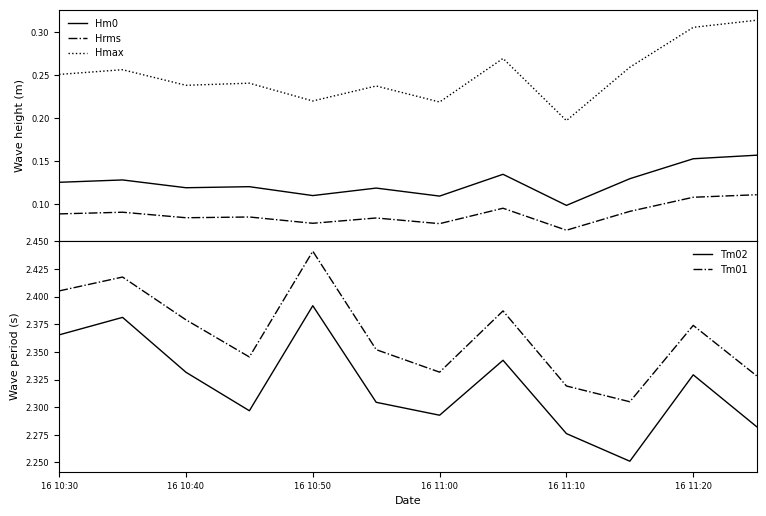

In [77]:
plt.rc('legend',**{'fontsize':7})

fig, (ax0, ax1) = plt.subplots(figsize=(9,6), nrows=2, sharex=True, 
                               gridspec_kw={'hspace': 0.})
ax0.plot(Wwave_time, W_Hm0, lw=1, c='k', label='Hm0')
ax0.plot(Wwave_time, W_Hrms, lw=1, c='k', ls='-.', label='Hrms')
ax0.plot(Wwave_time, W_Hmax, lw=1, c='k', ls=':', label='Hmax')
ax0.tick_params(axis='both', which='major', labelsize=6)
ax0.set_ylabel('Wave height (m)', fontsize=8)
plt.xlabel('Time', fontsize=8)
ax0.legend(loc=0,frameon=False)

ax1.plot(Wwave_time, W_Tm02, lw=1, c='k', label='Tm02')
ax1.plot(Wwave_time, W_Tm01, lw=1, c='k', ls='-.', label='Tm01')
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_ylabel('Wave period (s)', fontsize=8)
plt.xlabel('Date', fontsize=8)
plt.xlim(Wwave_time[0],Wwave_time[-1])
ax1.legend(loc=0,frameon=False)

plt.show()

## For gravity waves

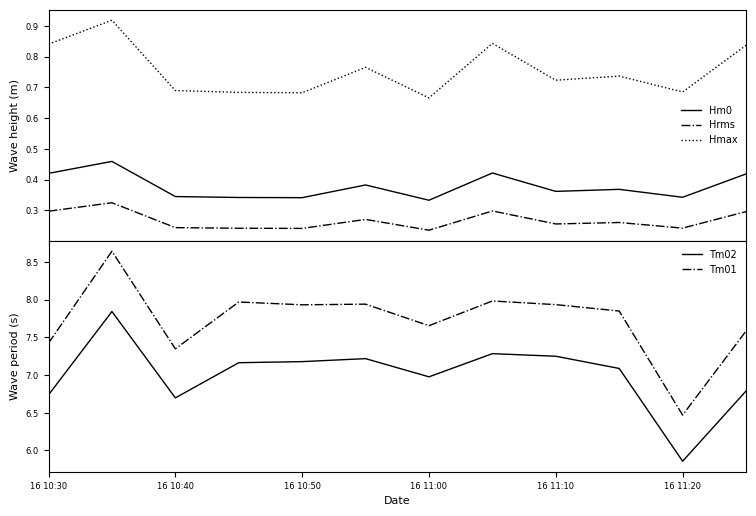

In [78]:
fig, (ax0, ax1) = plt.subplots(figsize=(9,6), nrows=2, sharex=True, 
                               gridspec_kw={'hspace': 0.})
ax0.plot(Gwave_time, G_Hm0, lw=1, c='k', label='Hm0')
ax0.plot(Gwave_time, G_Hrms, lw=1, c='k', ls='-.', label='Hrms')
ax0.plot(Gwave_time, G_Hmax, lw=1, c='k', ls=':', label='Hmax')
ax0.tick_params(axis='both', which='major', labelsize=6)
ax0.set_ylabel('Wave height (m)', fontsize=8)
plt.xlabel('Time', fontsize=8)
ax0.legend(loc=0,frameon=False)

ax1.plot(Gwave_time, G_Tm02, lw=1, c='k', label='Tm02')
ax1.plot(Gwave_time, G_Tm01, lw=1, c='k', ls='-.', label='Tm01')
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_ylabel('Wave period (s)', fontsize=8)
plt.xlabel('Date', fontsize=8)
plt.xlim(Gwave_time[0],Gwave_time[-1])
ax1.legend(loc=0,frameon=False)

plt.show()

## For infragravity waves

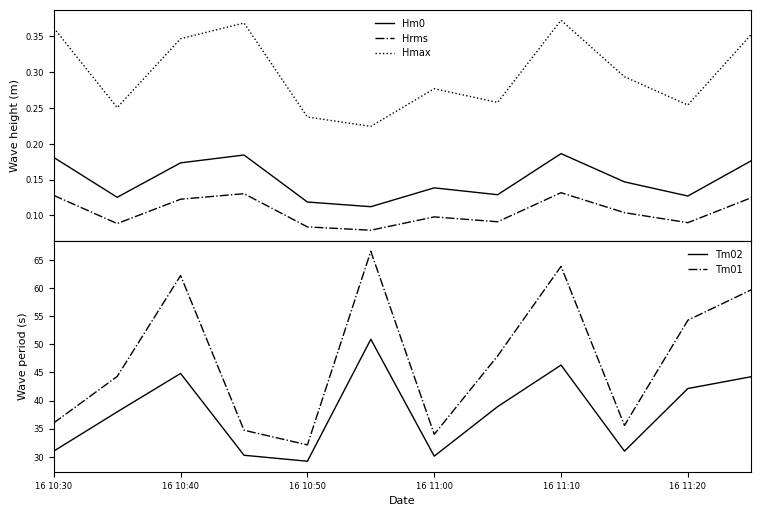

In [80]:
fig, (ax0, ax1) = plt.subplots(figsize=(9,6), nrows=2, sharex=True, 
                               gridspec_kw={'hspace': 0.})
ax0.plot(IGwave_time, IG_Hm0, lw=1, c='k', label='Hm0')
ax0.plot(IGwave_time, IG_Hrms, lw=1, c='k', ls='-.', label='Hrms')
ax0.plot(IGwave_time, IG_Hmax, lw=1, c='k', ls=':', label='Hmax')
ax0.tick_params(axis='both', which='major', labelsize=6)
ax0.set_ylabel('Wave height (m)', fontsize=8)
plt.xlabel('Time', fontsize=8)
ax0.legend(loc=0,frameon=False)

ax1.plot(IGwave_time, IG_Tm02, lw=1, c='k', label='Tm02')
ax1.plot(IGwave_time, IG_Tm01, lw=1, c='k', ls='-.', label='Tm01')
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_ylabel('Wave period (s)', fontsize=8)
plt.xlabel('Date', fontsize=8)
plt.xlim(IGwave_time[0],IGwave_time[-1])
ax1.legend(loc=0,frameon=False)

plt.show()

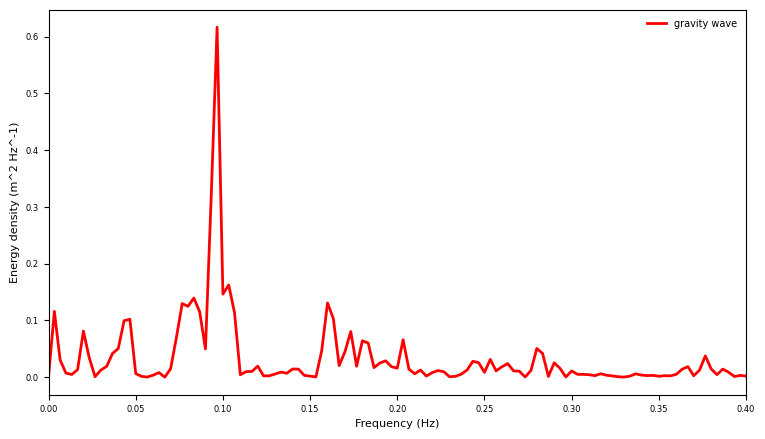

In [81]:
fig, ax0 = plt.subplots(figsize=(9,5), nrows=1, sharex=True, 
                        gridspec_kw={'hspace': 0})
ax0.plot(G_fspec, G_s[:-1], lw=2, c='r', label='gravity wave')
# ax0.plot(IG_fspec, IG_s, lw=2, c='b', label='infragravity wave')
ax0.tick_params(axis='both', which='major', labelsize=6)
ax0.set_ylabel('Energy density (m^2 Hz^-1)', fontsize=8)
plt.xlabel('Frequency (Hz)', fontsize=8)
plt.xlim(G_fspec.min(),G_fspec.max())
plt.xlim(0,0.4)
ax0.legend(loc=1,frameon=False)
plt.show()

<p style="color:red"> <font size="3"> <b>
Look at your spectra! Where are the energy peaks for the swell (less than 20s or more than 
0.05Hz) band? Can you see the wind waves and the swell waves? Which periods do they 
have? 
<ol>
<li> Are there any differences between Maroubra and Malabar?
<ul> 
<li> Why do you think that those differences in incident wave energy are so obvious? 
<li> What happens at Malabar?
<li> Is there any obvious grouping?
<li> Can you find the infragravity? 
    </ul>
<li> Can you find online the offshore wave conditions for the day of our fieldtrip? 
<br>
<li>What is the frequency that separates short waves from long waves both surfzones?  
<br>
<li>Which waves have the greatest energy? 
</ol> 

<p style="color:red"> <font size="3"> <b> What are the values for Malabar and Maroubra? What are the differences? Can you think of 
a reason (or several) why the results are so different. </p></font>
    
Can you make a plot comparing the spectral results from Malabar in part 2 with the results for maroubra in part 3?